This project contains a text summarization, sentimental analysis and topic modeling on a bcc news dataset

## Probelm
To the given bcc dataset make a text summarization, sentimental analysis and topic modeling

## Dataset
The dataset is taken from huggingface website. It includes 8 columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("news_sentiment_analysis.csv")
dataset.head()

,Source,Author,Title,Description,URL,Published At,Sentiment,Type
0,stgnews,Bridger Palmer,Pine View High teacher wins Best in State awar...,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",https://www.stgeorgeutah.com/news/archive/2024...,2024-07-12T23:45:25+00:00,positive,Business
1,Zimbabwe Mail,Staff Reporter,Businesses Face Financial Strain Amid Liquidit...,"Harare, Zimbabwe – Local businesses are grappl...",https://www.thezimbabwemail.com/business/busin...,2024-07-12T22:59:42+00:00,neutral,Business
2,4-traders,NaN,Musk donates to super pac working to elect Tru...,(marketscreener.com) Billionaire Elon Musk has...,https://www.marketscreener.com/business-leader...,2024-07-12T22:52:55+00:00,positive,Business
3,4-traders,NaN,US FTC issues warning to franchisors over unfa...,(marketscreener.com) A U.S. trade regulator on...,https://www.marketscreener.com/quote/stock/MCD...,2024-07-12T22:41:01+00:00,negative,Business
4,PLANET,NaN,Rooftop solar's dark side,4.5 million households in the U.S. have solar ...,https://www.npr.org/2024/07/12/1197961036/roof...,2024-07-12T22:28:19+00:00,positive,Business


In [3]:
dataset = dataset.drop(["Source", "Author", "Title", "URL", "Published At"], axis=1)
dataset

,Description,Sentiment,Type
0,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",positive,Business
1,"Harare, Zimbabwe – Local businesses are grappl...",neutral,Business
2,(marketscreener.com) Billionaire Elon Musk has...,positive,Business
3,(marketscreener.com) A U.S. trade regulator on...,negative,Business
4,4.5 million households in the U.S. have solar ...,positive,Business
...,...,...,...
3495,QRG Capital Management Inc. increased its stak...,positive,Technology
3496,QRG Capital Management Inc. bought a new posit...,positive,Technology
3497,QRG Capital Management Inc. boosted its stake ...,positive,Technology
3498,"WESTFORD, Mass., July 18, 2024 /PRNewswire/ --...",neutral,Technology


In [4]:
dataset["Sentiment"].value_counts()

Sentiment
positive    2134
neutral      789
negative     577
Name: count, dtype: int64

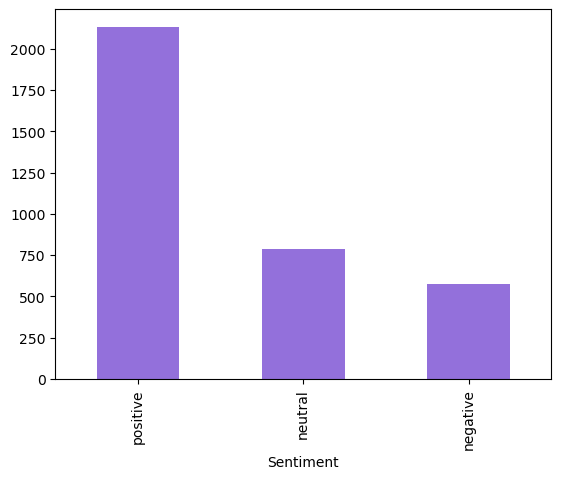

In [5]:
dataset["Sentiment"].value_counts().plot(kind="bar", color="mediumpurple");

In [6]:
dataset.head()

,Description,Sentiment,Type
0,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",positive,Business
1,"Harare, Zimbabwe – Local businesses are grappl...",neutral,Business
2,(marketscreener.com) Billionaire Elon Musk has...,positive,Business
3,(marketscreener.com) A U.S. trade regulator on...,negative,Business
4,4.5 million households in the U.S. have solar ...,positive,Business


In [7]:
description_types = dataset.groupby('Type').count()['Description'].reset_index()
description_types

,Type,Description
0,Business,500
1,Entertainment,500
2,General,500
3,Health,500
4,Science,500
5,Sports,500
6,Technology,500


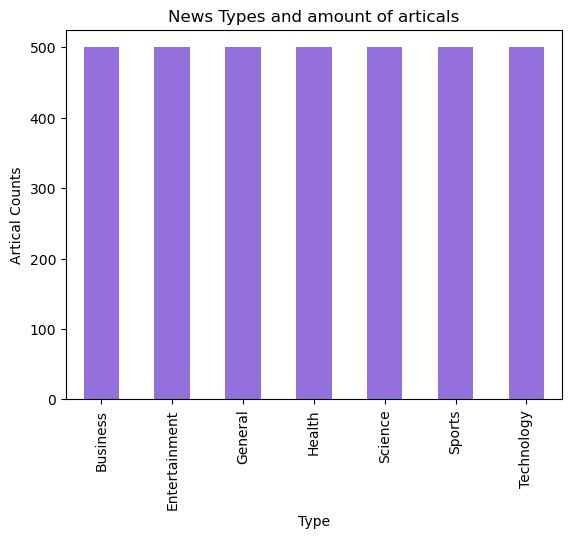

In [8]:
dataset.groupby('Type').count()['Description'].plot(kind="bar", color="mediumpurple")
plt.title("News Types and amount of articals")
plt.ylabel("Artical Counts");

In [9]:
# dataset types
dataset.dtypes

Description    object
Sentiment      object
Type           object
dtype: object

In [10]:
# checking for null values
dataset.isna().sum()

Description    0
Sentiment      0
Type           0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  3500 non-null   object
 1   Sentiment    3500 non-null   object
 2   Type         3500 non-null   object
dtypes: object(3)
memory usage: 82.2+ KB


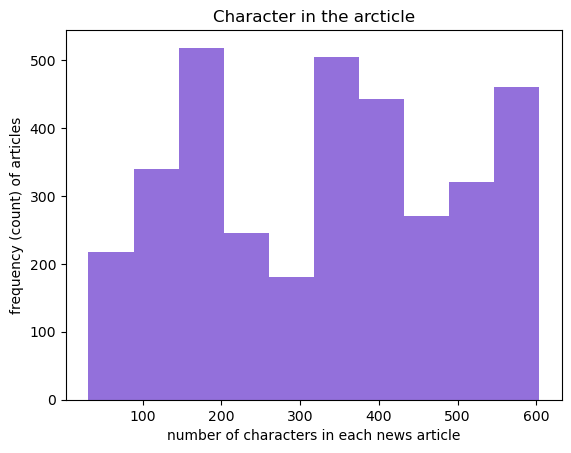

In [12]:
# the number of characters appear in each news line
ax = dataset['Description'].str.len().plot(kind="hist", color="mediumpurple")

# Set various attributes
ax.set(title="Character in the arcticle", 
       xlabel="number of characters in each news article", 
       ylabel="frequency (count) of articles");

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thiyara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


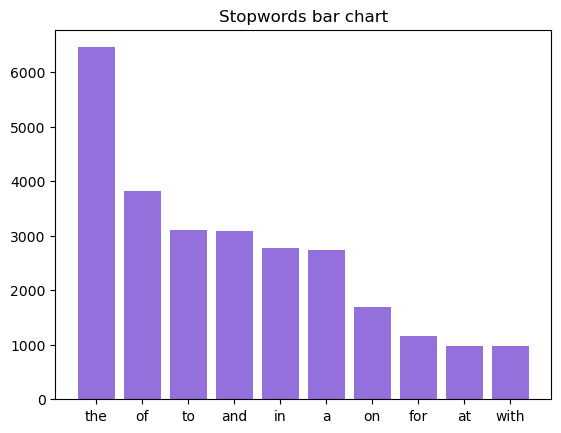

In [13]:
# ploting a stopwords bar chart
import re 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))
from collections import defaultdict

corpus = []
article = dataset["Description"].str.split()
article = article.values.tolist()
corpus=[word for i in article for word in i]
dic = defaultdict(int)

for word in corpus:
    if word in stop:
        dic[word]+=1

def plot_top_stopwords_barchart(text):
    stop = set(stopwords.words('english'))

    article = text.str.split()
    article = article.values.tolist()
    corpus=[word for i in article for word in i]
    dic = defaultdict(int)

    for word in corpus:
        if word in stop:
            dic[word]+=1

    top = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x, y, color="mediumpurple")
    plt.title("Stopwords bar chart")
plot_top_stopwords_barchart(dataset["Description"])

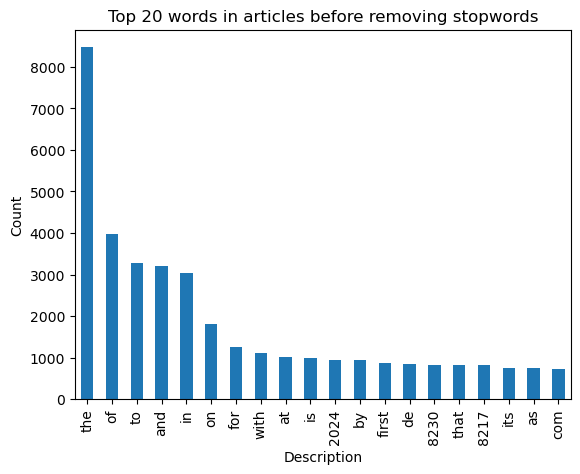

In [14]:
# top 20 words before removing stopwords bar chart
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x:x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(dataset["Description"], 20)
dataframe1 = pd.DataFrame(common_words, columns = ['Description', 'count'])
dataframe1.groupby('Description').sum()['count'].sort_values(ascending=False).plot(kind='bar',
                                                                                ylabel='Count',
                                                                                title='Top 20 words in articles before removing stopwords');


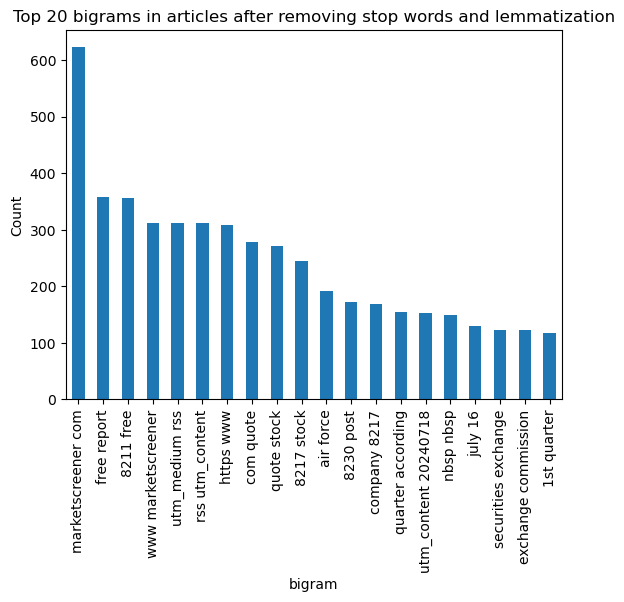

In [15]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key =lambda x:x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(dataset["Description"], 20)
dataframe2 = pd.DataFrame(common_words, columns = ['bigram', 'count'])
dataframe2.groupby('bigram').sum()['count'].sort_values(ascending=False).plot(kind='bar',
                                                                              ylabel='Count',
                                                                              title='Top 20 bigrams in articles after removing stop words and lemmatization');



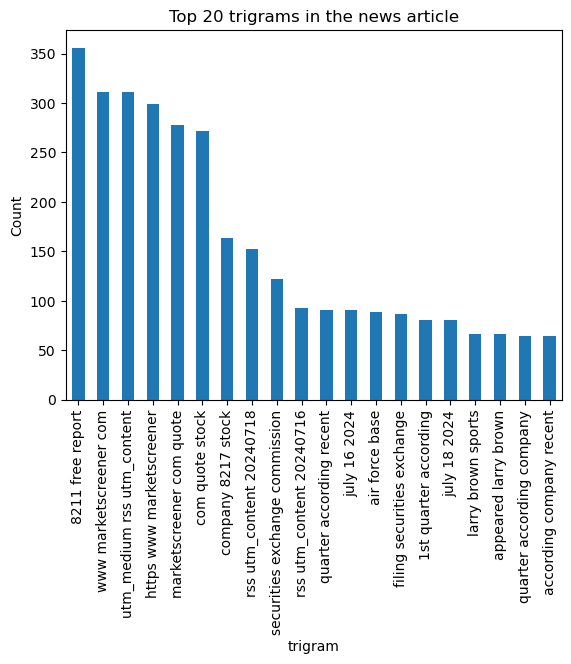

In [16]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(dataset["Description"], 20)
dataframe3 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

dataframe3.groupby('trigram').sum()['count'].sort_values(ascending=False).plot(kind='bar',
                                                                              ylabel='Count',
                                                                              title='Top 20 trigrams in the news article');



## Data Cleaning

In [17]:
dataset

,Description,Sentiment,Type
0,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",positive,Business
1,"Harare, Zimbabwe – Local businesses are grappl...",neutral,Business
2,(marketscreener.com) Billionaire Elon Musk has...,positive,Business
3,(marketscreener.com) A U.S. trade regulator on...,negative,Business
4,4.5 million households in the U.S. have solar ...,positive,Business
...,...,...,...
3495,QRG Capital Management Inc. increased its stak...,positive,Technology
3496,QRG Capital Management Inc. bought a new posit...,positive,Technology
3497,QRG Capital Management Inc. boosted its stake ...,positive,Technology
3498,"WESTFORD, Mass., July 18, 2024 /PRNewswire/ --...",neutral,Technology


In [18]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = dataset[dataset.duplicated()]
print(duplicateRowsDF)

                                            Description Sentiment        Type
16    Footprints Floors of Solano is currently a one...  positive    Business
41    Associated Press HOUSTON (AP) — Widespread pow...  positive    Business
47    Before DeGeneres said last week that she's goi...  negative    Business
57    “Qatar Airways has a so-called ‘business class...  positive    Business
58    “Qatar Airways has a so-called ‘business class...  positive    Business
...                                                 ...       ...         ...
3495  QRG Capital Management Inc. increased its stak...  positive  Technology
3496  QRG Capital Management Inc. bought a new posit...  positive  Technology
3497  QRG Capital Management Inc. boosted its stake ...  positive  Technology
3498  WESTFORD, Mass., July 18, 2024 /PRNewswire/ --...   neutral  Technology
3499  QRG Capital Management Inc. reduced its holdin...  positive  Technology

[1031 rows x 3 columns]


In [19]:
dataset.drop_duplicates(subset=['Description'], keep='first', inplace=True)
dataset.shape

(2377, 3)

In [20]:
dataset

,Description,Sentiment,Type
0,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",positive,Business
1,"Harare, Zimbabwe – Local businesses are grappl...",neutral,Business
2,(marketscreener.com) Billionaire Elon Musk has...,positive,Business
3,(marketscreener.com) A U.S. trade regulator on...,negative,Business
4,4.5 million households in the U.S. have solar ...,positive,Business
...,...,...,...
2795,QRG Capital Management Inc. increased its stak...,positive,Technology
2796,QRG Capital Management Inc. bought a new posit...,positive,Technology
2797,QRG Capital Management Inc. boosted its stake ...,positive,Technology
2798,"WESTFORD, Mass., July 18, 2024 /PRNewswire/ --...",neutral,Technology


In [21]:
# resetting the index
dataset = dataset.reset_index()
dataset

,index,Description,Sentiment,Type
0,0,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",positive,Business
1,1,"Harare, Zimbabwe – Local businesses are grappl...",neutral,Business
2,2,(marketscreener.com) Billionaire Elon Musk has...,positive,Business
3,3,(marketscreener.com) A U.S. trade regulator on...,negative,Business
4,4,4.5 million households in the U.S. have solar ...,positive,Business
...,...,...,...,...
2372,2795,QRG Capital Management Inc. increased its stak...,positive,Technology
2373,2796,QRG Capital Management Inc. bought a new posit...,positive,Technology
2374,2797,QRG Capital Management Inc. boosted its stake ...,positive,Technology
2375,2798,"WESTFORD, Mass., July 18, 2024 /PRNewswire/ --...",neutral,Technology


In [22]:
dataset = dataset.drop(["index"], axis=1)
dataset

,Description,Sentiment,Type
0,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",positive,Business
1,"Harare, Zimbabwe – Local businesses are grappl...",neutral,Business
2,(marketscreener.com) Billionaire Elon Musk has...,positive,Business
3,(marketscreener.com) A U.S. trade regulator on...,negative,Business
4,4.5 million households in the U.S. have solar ...,positive,Business
...,...,...,...
2372,QRG Capital Management Inc. increased its stak...,positive,Technology
2373,QRG Capital Management Inc. bought a new posit...,positive,Technology
2374,QRG Capital Management Inc. boosted its stake ...,positive,Technology
2375,"WESTFORD, Mass., July 18, 2024 /PRNewswire/ --...",neutral,Technology


In [23]:
# import regular expression and natural language tool kit
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thiyara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
corpus = []

for i in range(len(dataset)):
    statement = re.sub('[^a-zA-Z]', ' ', dataset['Description'][i])
    statement = statement.lower()
    statement = statement.split()
    statement = [ps.stem(word) for word in statement if not word in set(all_stopwords)]
    statement = ' '.join(statement)
    corpus.append(statement)

### Sentimental Analysis

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1200)

In [26]:
cv.fit(corpus)
print("Vocabulary: ",cv.vocabulary_)

Vocabulary:  {'st': 1022, 'first': 414, 'year': 1193, 'view': 1147, 'high': 500, 'school': 944, 'recent': 885, 'receiv': 884, 'best': 115, 'state': 1029, 'award': 96, 'busi': 140, 'leadership': 605, 'cours': 242, 'student': 1047, 'pass': 786, 'rate': 876, 'fall': 395, 'final': 409, 'local': 633, 'sever': 974, 'limit': 624, 'marketscreen': 659, 'com': 199, 'elon': 340, 'musk': 705, 'super': 1056, 'work': 1185, 'elect': 337, 'former': 429, 'presid': 831, 'donald': 310, 'trump': 1114, 'report': 899, 'friday': 439, 'sourc': 1009, 'not': 736, 'much': 703, 'ad': 12, 'given': 456, 'group': 475, 'call': 145, 'america': 49, 'http': 518, 'www': 1191, 'leader': 604, 'news': 728, 'utm': 1138, 'medium': 670, 'rss': 931, 'content': 228, 'trade': 1103, 'suit': 1053, 'action': 10, 'take': 1064, 'aim': 34, 'said': 936, 'brand': 131, 'owner': 773, 'requir': 903, 'new': 727, 'contract': 230, 'use': 1136, 'speak': 1015, 'quot': 870, 'stock': 1035, 'corpor': 235, 'us': 1133, 'issu': 563, 'warn': 1157, 'pra

In [27]:
doc_array = cv.transform(corpus).toarray()
doc_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
frequency_matrix = pd.DataFrame(doc_array,index=corpus,columns=cv.get_feature_names_out())
frequency_matrix

,academi,access,accesswir,accord,account,achiev,acquir,acquisit,across,act,...,wwe,www,xico,year,yet,york,young,youtub,zeigt,zu
st georg kaitlyn larson first year teacher pine view high school recent receiv best state award busi leadership cours larson student grade highest pass rate youscienc exam spring fall semest youscienc exam similar final exam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
harar zimbabw local busi grappl sever liquid crunch limit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
marketscreen com billionair elon musk donat super pac work elect former u presid donald trump bloomberg report friday cite sourc report not indic much musk donat ad sizabl amount given group call america pac http www marketscreen com busi leader elon musk news musk donat super pac work elect trump bloomberg report utm medium rss utm content,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
marketscreen com u trade regul fridayannounc suit action take aim unfair deceptivepractic said illeg impos u franchise bytheir brand owner requir new fee not outlin infranchis contract use contract provis discouragefranchise speak regul http www marketscreen com quot stock mcdonald corpor news us ftc issu warn franchisor unfair busi practic utm medium rss utm content,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
million household u solar panel home custom happi electr bill disappear great planet thousand thousand peopl realli disappoint sold panel expens say hard get someon come fix break turn sometim crummi custom experi accid tie back big nation solar compani built busi first place entic peopl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qrg capit manag inc increas stake share arrow electron inc nyse arw free report st quarter accord recent f file secur exchang commiss sec fund own share technolog compani stock purchas addit share,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
qrg capit manag inc bought new posit nice ltd nasdaq nice free report first quarter accord recent disclosur secur exchang commiss institut investor bought share technolog compani stock valu approxim institut investor hedg fund also recent,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
qrg capit manag inc boost stake akamai technolog inc nasdaq akam free report first quarter accord compani recent file sec fund own share technolog infrastructur compani stock buy addit share period qrg capit,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
westford mass juli prnewswir accord skyquest global biotechnolog market size valu usd trillion pois grow usd trillion,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X = cv.fit_transform(corpus).toarray()
len(X)

2377

In [30]:
y = dataset["Sentiment"]
len(y)

2377

In [31]:
#split train and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [32]:
y_train

2094    positive
286      neutral
668     positive
406     positive
554     positive
          ...   
1638    positive
1095    positive
1130    positive
1294    negative
860     positive
Name: Sentiment, Length: 1901, dtype: object

Before SMOTE class distribution: Counter({'positive': 1194, 'neutral': 398, 'negative': 309})


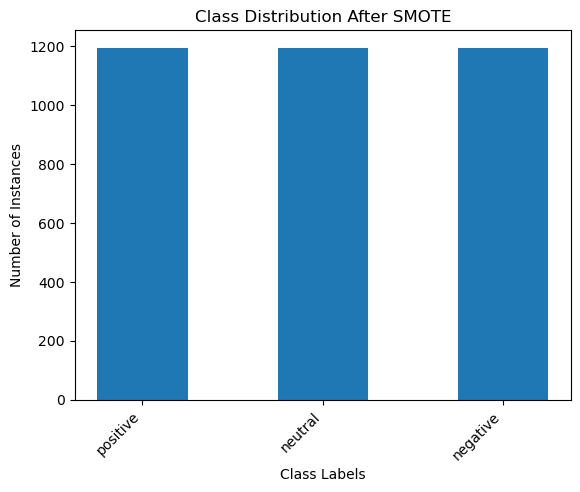

After SMOTE class distribution: Counter({'positive': 1194, 'neutral': 1194, 'negative': 1194})


In [33]:
!pip install imbalanced-learn

# Import the necessary libraries
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


print("Before SMOTE class distribution:", Counter(y_train))

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data (x_train and y_train)
X_train, y_train_resampled = smote.fit_resample(X_train, y_train)

# Count the number of instances in each class after SMOTE
class_counts = Counter(y_train_resampled)

# Plot the class distribution
labels, values = zip(*class_counts.items())  # Unzip the labels and counts

plt.bar(labels, values, width=0.5)

plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.title('Class Distribution After SMOTE')
# Rotate x-axis labels for better readability
plt.xticks(labels, rotation=45, ha='right', fontsize=10)

plt.show()

# Print the class distribution after SMOTE
print("After SMOTE class distribution:", Counter(y_train_resampled))

In [34]:
from sklearn.preprocessing import LabelEncoder
# Encode target labels into numerical values using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train_resampled)  # Encode SMOTE-resampled training labels
y_test = label_encoder.transform(y_test)  # Encode test labels using the same encoder


***XG Boost***

In [35]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifierxgb_model = XGBClassifier(
    n_estimators=100,  # Number of trees
    max_depth=5,  # Maximum depth of each tree
    learning_rate=0.1,  # Learning rate (eta)
    use_label_encoder=False,  # Turn off label encoder 
    eval_metric='mlogloss',  # Metric for multi-class classification
    random_state=42
)

# Train the model on the resampled and scaled training data
xgb_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_train = xgb_model.predict(X_train)  # Predictions on training set
y_pred_test = xgb_model.predict(X_test)  # Predictions on test set


D:\Softwares\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:43:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.809324399776661
Test Accuracy: 0.7415966386554622
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.42      0.44      0.43        73
           1       0.64      0.81      0.71       105
           2       0.89      0.79      0.84       298

    accuracy                           0.74       476
   macro avg       0.65      0.68      0.66       476
weighted avg       0.76      0.74      0.75       476


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.72      0.86      0.78      1194
           1       0.79      0.73      0.76      1194
           2       0.94      0.84      0.89      1194

    accuracy                           0.81      3582
   macro avg       0.82      0.81      0.81      3582
weighted avg       0.82      0.81      0.81      3582



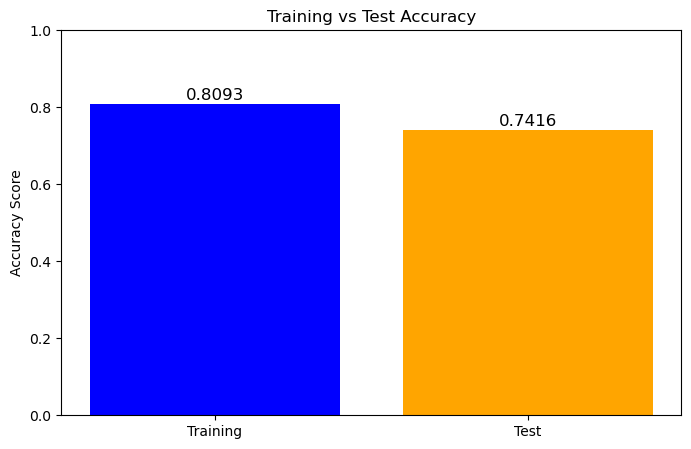

In [36]:
#Evaluating the Model

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# Accuracy on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy}")

# Accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy}")

# Classification report on the test & training set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

# Define the labels and accuracies for the bar chart
labels = ['Training', 'Test']
accuracies = [train_accuracy, test_accuracy]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')
plt.title('Training vs Test Accuracy')
# Show the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)
plt.show()


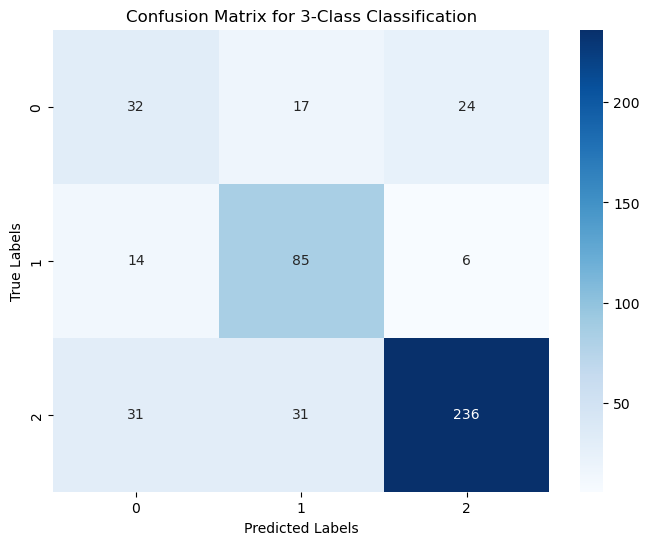

In [37]:
# Import Seaborn
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])

# Add labels, title and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3-Class Classification')
plt.show()

Hyper Parameter Tuning

Fitting 10 folds for each of 10 candidates, totalling 100 fits


D:\Softwares\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:14:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.6, 'reg_lambda': 3, 'reg_alpha': 1, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}


D:\Softwares\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:14:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Model Training Accuracy: 0.768285873813512
Best Model Test Accuracy: 0.7121848739495799
Classification Report on Test Set (Best Model):
              precision    recall  f1-score   support

           0       0.36      0.33      0.34        73
           1       0.60      0.81      0.69       105
           2       0.86      0.77      0.81       298

    accuracy                           0.71       476
   macro avg       0.61      0.64      0.62       476
weighted avg       0.73      0.71      0.71       476


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1194
           1       0.74      0.70      0.72      1194
           2       0.89      0.82      0.85      1194

    accuracy                           0.77      3582
   macro avg       0.77      0.77      0.77      3582
weighted avg       0.77      0.77      0.77      3582



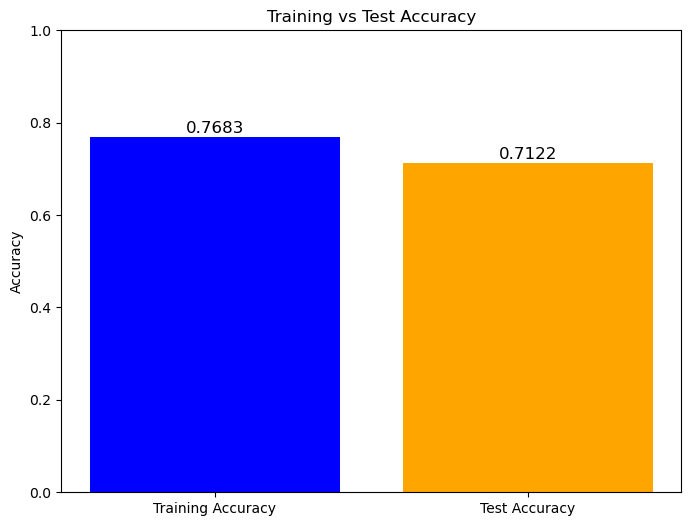

In [52]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],  # Reduce depth to avoid overfitting
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8],  # Reduce subsampling to force generalization
    'colsample_bytree': [0.6, 0.8],  # Use fewer features to prevent overfitting
    'gamma': [0, 0.1, 0.3],  # Increase gamma to prune branches
    'reg_alpha': [0.1, 0.5, 1],  # Increase L1 regularization
    'reg_lambda': [1, 2, 3]  # Increase L2 regularization
}

# Calculate class weights
class_0_weight = len(y_train) / sum(y_train == 0)
class_1_weight = len(y_train) / sum(y_train == 1)
class_2_weight = len(y_train) / sum(y_train == 2)

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight={0: class_0_weight, 1: class_1_weight, 2: class_2_weight},  # Adjust for class imbalance
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Set up cross-validation with StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=10, 
    cv=skf, 
    scoring='accuracy', 
    random_state=42, 
    verbose=1, 
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the best model
best_xgb_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Fit the model on the training data
best_xgb_model.fit(X_train, y_train)

# Make predictions using the best model
y_pred_train_best = best_xgb_model.predict(X_train)
y_pred_test_best = best_xgb_model.predict(X_test)

# Evaluate the best model
train_accuracy_best = accuracy_score(y_train, y_pred_train_best)
test_accuracy_best = accuracy_score(y_test, y_pred_test_best)

print(f"Best Model Training Accuracy: {train_accuracy_best}")
print(f"Best Model Test Accuracy: {test_accuracy_best}")

# Classification report for test set
print("Classification Report on Test Set (Best Model):")
print(classification_report(y_test, y_pred_test_best))

# Classification report for training set
print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_pred_train_best))

# Plot Training vs Test Accuracy
accuracies = [train_accuracy_best, test_accuracy_best]
labels = ['Training Accuracy', 'Test Accuracy']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.title('Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  

# Show the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)

plt.show()


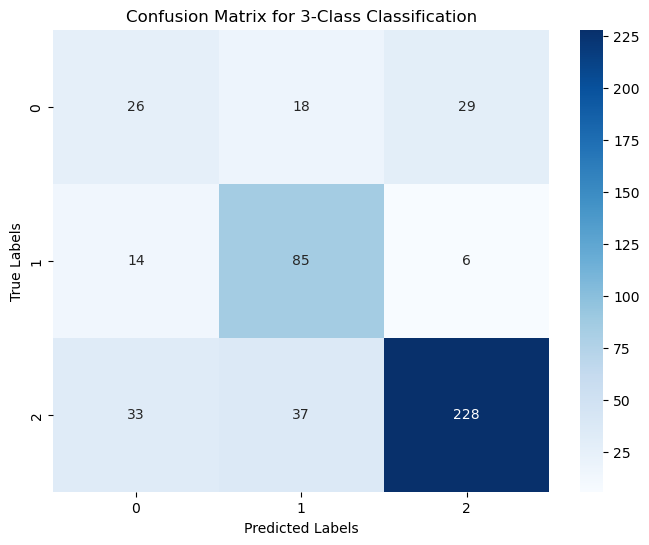

In [50]:
# Import Seaborn
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_test_best)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])

# Add labels, title and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3-Class Classification')
plt.show()

***RandomForestClassification***

In [40]:
# Importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

Training Accuracy: 0.9399776661083193
Test Accuracy: 0.7037815126050421

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.86      0.97      0.92      1194
           1       0.97      0.85      0.90      1194
           2       1.00      1.00      1.00      1194

    accuracy                           0.94      3582
   macro avg       0.94      0.94      0.94      3582
weighted avg       0.94      0.94      0.94      3582


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.33      0.30      0.31        73
           1       0.61      0.78      0.68       105
           2       0.84      0.78      0.81       298

    accuracy                           0.70       476
   macro avg       0.59      0.62      0.60       476
weighted avg       0.71      0.70      0.70       476



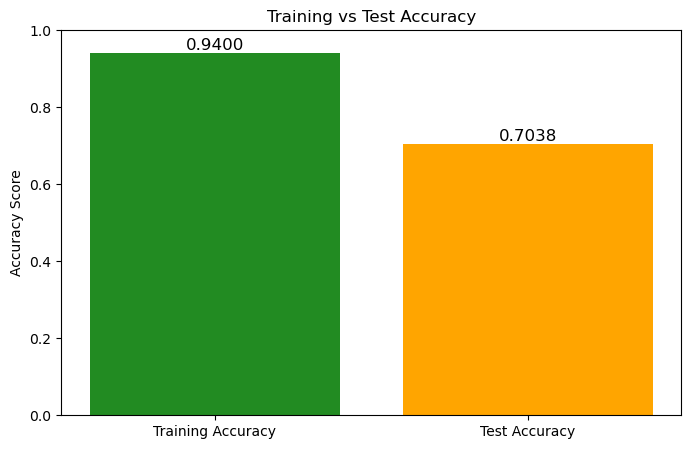

In [41]:
# Importing necessary libraries for evaluation and visualization
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Evaluate the model on training and test sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracy metrics
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Generate classification reports for training and test sets
print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred_test))

# Plotting the training and test accuracy
accuracies = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['forestgreen', 'orange'])
plt.ylim(0, 1)  

# Add labels and title
plt.ylabel('Accuracy Score')
plt.title('Training vs Test Accuracy')
# Show the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)

# Display the plot
plt.show()

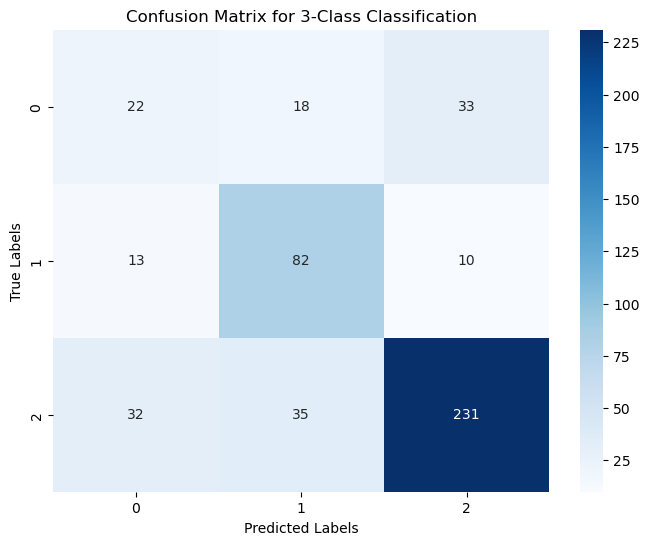

In [42]:
# Import Seaborn
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])

# Add labels, title and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3-Class Classification')
plt.show()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training Accuracy: 0.8458961474036851
Test Accuracy: 0.7247899159663865
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.39      0.23      0.29        73
           1       0.63      0.72      0.67       105
           2       0.81      0.85      0.83       298

    accuracy                           0.72       476
   macro avg       0.61      0.60      0.60       476
weighted avg       0.71      0.72      0.71       476


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1194
           1       0.85      0.77      0.81      1194
           2       0.90      0.93      0.92      1194

    accuracy                           0.85      3582
   macro

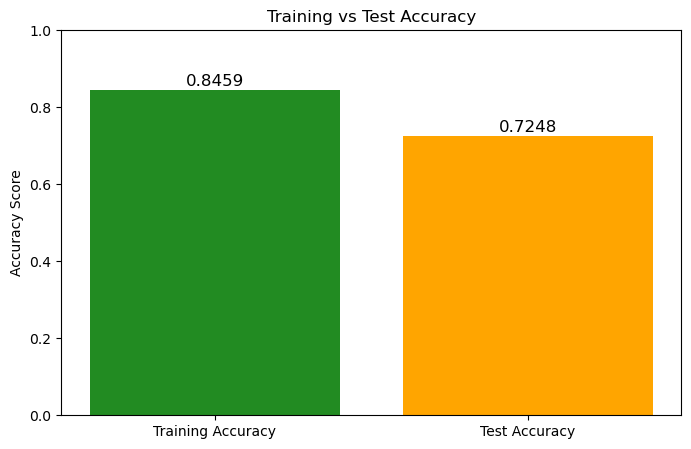

In [43]:
#Hyperparameter tune
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score


rf_model = RandomForestClassifier(random_state=42)

# Define a parameter grid that balances simplicity and performance
param_grid = {
    'n_estimators': [50, 100],  # Smaller number of trees to reduce complexity
    'max_depth': [None, 10],  # Allow deeper trees where necessary
    'min_samples_split': [5, 10],  # Prevent overfitting by requiring more samples
    'min_samples_leaf': [2, 4],  # Prevent overfitting with larger leaf nodes
    'max_features': ['sqrt'],  # Standard choice for classification
}


skf = StratifiedKFold(n_splits=5)


rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                              cv=skf, verbose=2, n_jobs=-1)


rf_grid_search.fit(X_train, y_train)


print("Best Parameters:", rf_grid_search.best_params_)

# Use the best model
best_rf_model = rf_grid_search.best_estimator_

# Evaluate the best model on the training and test set
y_pred_train_best = best_rf_model.predict(X_train)
y_pred_test_best = best_rf_model.predict(X_test)

# Training set evaluation
print("Training Accuracy:", accuracy_score(y_train, y_pred_train_best))
train_accuracy = accuracy_score(y_train, y_pred_train_best)

# Test set evaluation
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_best))
test_accuracy = accuracy_score(y_test, y_pred_test_best)

# Classification report on the test & training set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test_best))

print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_pred_train_best))

# Plotting the training and test accuracy
accuracies = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']


plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['forestgreen', 'orange'])
plt.ylim(0, 1)  
plt.ylabel('Accuracy Score')
plt.title('Training vs Test Accuracy')
# Show the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)

plt.show()

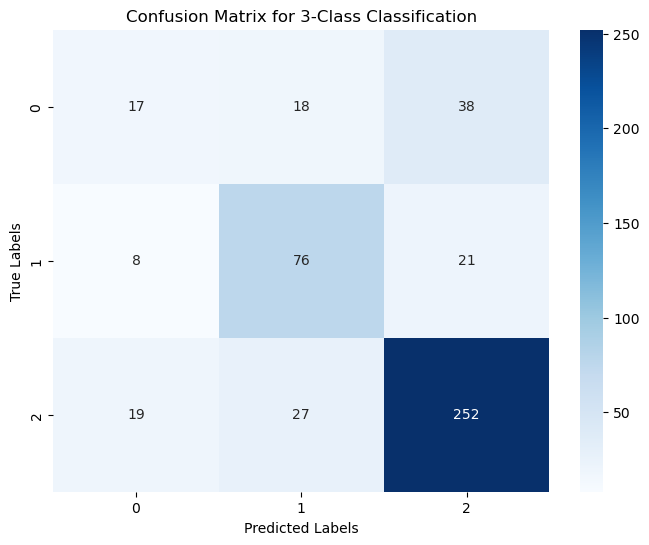

In [44]:
# Import Seaborn
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_test_best)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])

# Add labels, title and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3-Class Classification')
plt.show()

***Cat Boost***

In [45]:
from catboost import CatBoostClassifier

# Initialize the CatBoost model
catboost_model = CatBoostClassifiercatboost_model = CatBoostClassifier(
    iterations=100,  # Number of boosting iterations
    depth=6,  # Depth of each tree
    learning_rate=0.1,  # Learning rate
    loss_function='MultiClass',  # For multi-class classification
    random_seed=42,
    verbose=False  # Set to True to get detailed output during training
)

# Train the model on the resampled and scaled training data
catboost_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_train = catboost_model.predict(X_train)
y_pred_test = catboost_model.predict(X_test)


Training Accuracy: 0.740926856504746
Test Accuracy: 0.6974789915966386
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.36      0.44      0.39        73
           1       0.59      0.73      0.66       105
           2       0.87      0.75      0.81       298

    accuracy                           0.70       476
   macro avg       0.61      0.64      0.62       476
weighted avg       0.73      0.70      0.71       476


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.66      0.74      0.70      1194
           1       0.72      0.68      0.70      1194
           2       0.87      0.80      0.83      1194

    accuracy                           0.74      3582
   macro avg       0.75      0.74      0.74      3582
weighted avg       0.75      0.74      0.74      3582

Confusion Matrix on Test Set:
[[ 32  14  27]
 [ 22  77   6]
 [ 36  39 223]]


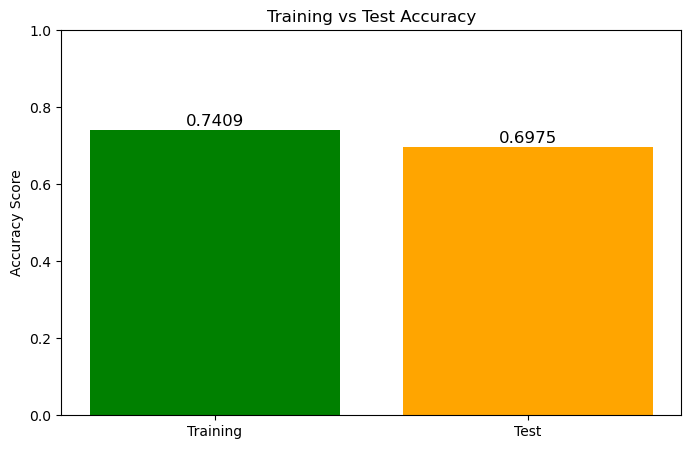

In [473]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Accuracy on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy}")

# Accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy}")

# Classification report on the test & training set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

# Confusion matrix on the test set
print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_pred_test))

# Define the labels and accuracies for the bar chart
labels = ['Training', 'Test']
accuracies = [train_accuracy, test_accuracy]


plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['green', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')
plt.title('Training vs Test Accuracy')
# Show the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)
plt.show()

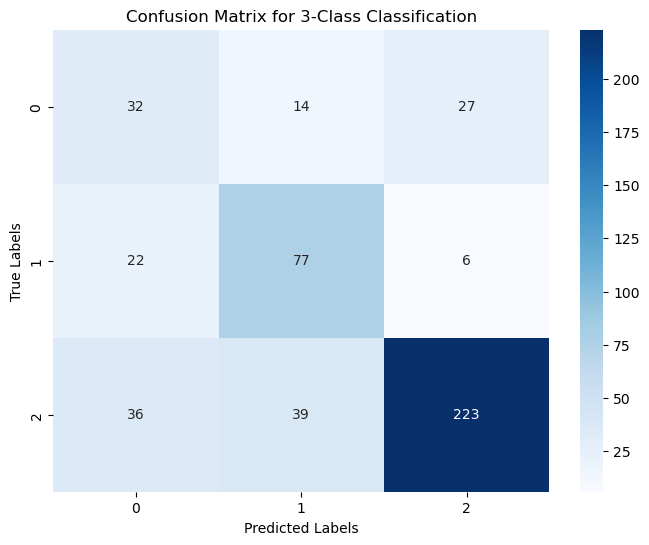

In [475]:
# Import Seaborn
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3-Class Classification')
plt.show()

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0:	learn: 1.0698684	total: 29.1ms	remaining: 3.47s
100:	learn: 0.6822699	total: 2.94s	remaining: 553ms
119:	learn: 0.6578796	total: 3.56s	remaining: 0us
Best Parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 10, 'iterations': 120, 'depth': 8}
Best Model Training Accuracy: 0.7604690117252931
Best Model Test Accuracy: 0.7037815126050421
Classification Report on Test Set (Best Model):
              precision    recall  f1-score   support

           0       0.36      0.40      0.38        73
           1       0.60      0.80      0.69       105
           2       0.87      0.74      0.80       298

    accuracy                           0.70       476
   macro avg       0.61      0.65      0.62       476
weighted avg       0.73      0.70      0.71       476


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.66      0.74      0.70      1194
           1       0.

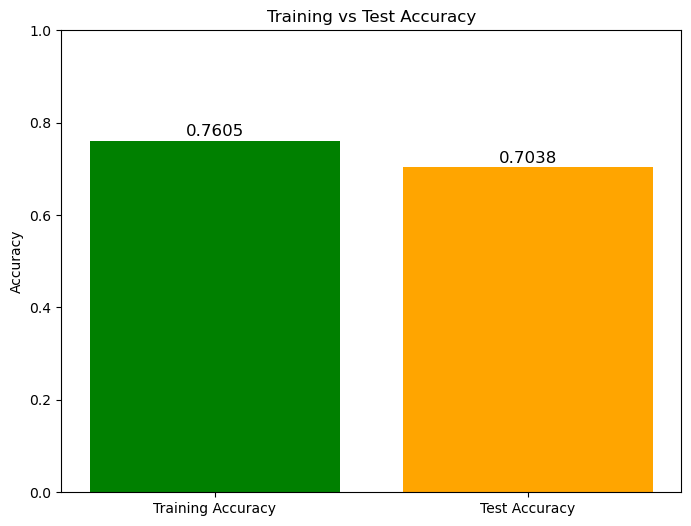

In [477]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

# Define the parameter grid
param_dist = {
    'iterations': [120,100],         # Number of trees
    'depth': [4, 2, 8],                     # Depth of trees
    'learning_rate': [0.01, 0.05, 0.1],     # Learning rate
    'l2_leaf_reg': [5, 7, 10],            # L2 regularization term
             
}


catboost_model = CatBoostClassifier(random_seed=42, verbose=100)


random_search = RandomizedSearchCV(estimator=catboost_model, param_distributions=param_dist, 
                                   n_iter=10, cv=10, scoring='accuracy', random_state=42, verbose=1, n_jobs=-1)


random_search.fit(X_train, y_train)


best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred_train_best = best_model.predict(X_train)
y_pred_test_best = best_model.predict(X_test)

# Evaluate the best model
train_accuracy_best = accuracy_score(y_train, y_pred_train_best)
test_accuracy_best = accuracy_score(y_test, y_pred_test_best)

print(f"Best Model Training Accuracy: {train_accuracy_best}")
print(f"Best Model Test Accuracy: {test_accuracy_best}")

# Classification report and confusion matrix for the best model
print("Classification Report on Test Set (Best Model):")
print(classification_report(y_test, y_pred_test_best))

print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

print("Confusion Matrix on Test Set (Best Model):")
print(confusion_matrix(y_test, y_pred_test_best))

# Accuracy values
accuracies = [train_accuracy_best, test_accuracy_best]
labels = ['Training Accuracy', 'Test Accuracy']


plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['green', 'orange'])
plt.title('Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  

# Show the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)


plt.show()

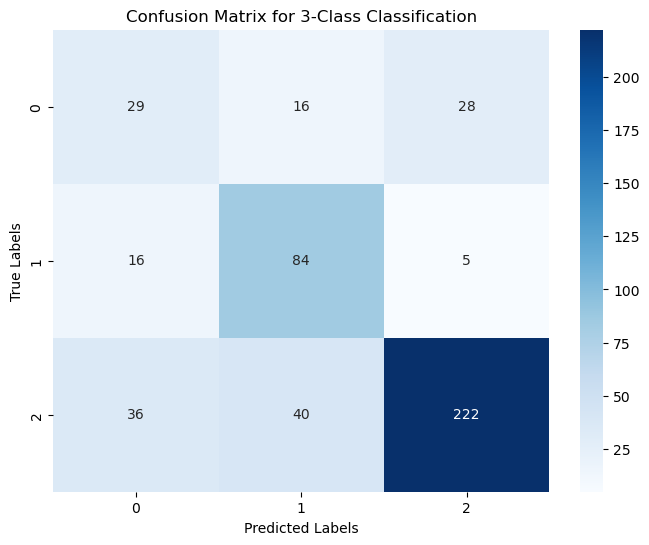

In [479]:
# Import Seaborn
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_test_best)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])

# Add labels, title and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for 3-Class Classification')
plt.show()

In [481]:

import numpy as np

# Function to preprocess new input text
def preprocessing(text):
    statement = re.sub('[^a-zA-Z]', ' ', text)
    statement = statement.lower()
    statement = statement.split()
    statement = [ps.stem(word) for word in statement if not word in set(all_stopwords)]
    preprocessed_text = ' '.join(statement)
    return preprocessed_text

# Function to vectorize new input text using the existing CountVectorizer
def vectorize_new_text(text, vectorizer):
    preprocessed_text = preprocessing(text)
    vectorized_text = vectorizer.transform([preprocessed_text]).toarray()  # Ensure text is in list format
    return vectorized_text

# Function to predict the sentiment of the new input text using the trained model
def get_prediction(vectorized_text, best_xbg_model, label_encoder):
    prediction = best_xbg_model.predict(vectorized_text)  # Predict using the trained model
    prediction_label = label_encoder.inverse_transform([int(prediction[0])])  # Convert prediction to sentiment label
    return prediction_label[0]


# predict using the trained model
txt = "WESTFORD, Mass., July 18, 2024 /PRNewswire/ -- According to SkyQuest, the global Biotechnology Market size was valued at USD 1.21 Trillion in 2022 and is poised to grow from USD 1.38 Trillion in 2..."
vectorized_txt = vectorize_new_text(txt, cv)  
prediction = get_prediction(vectorized_txt, best_xbg_model, label_encoder) 
print(f"Predicted sentiment: {prediction}")




Predicted sentiment: neutral


C:\Users\User\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:44:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


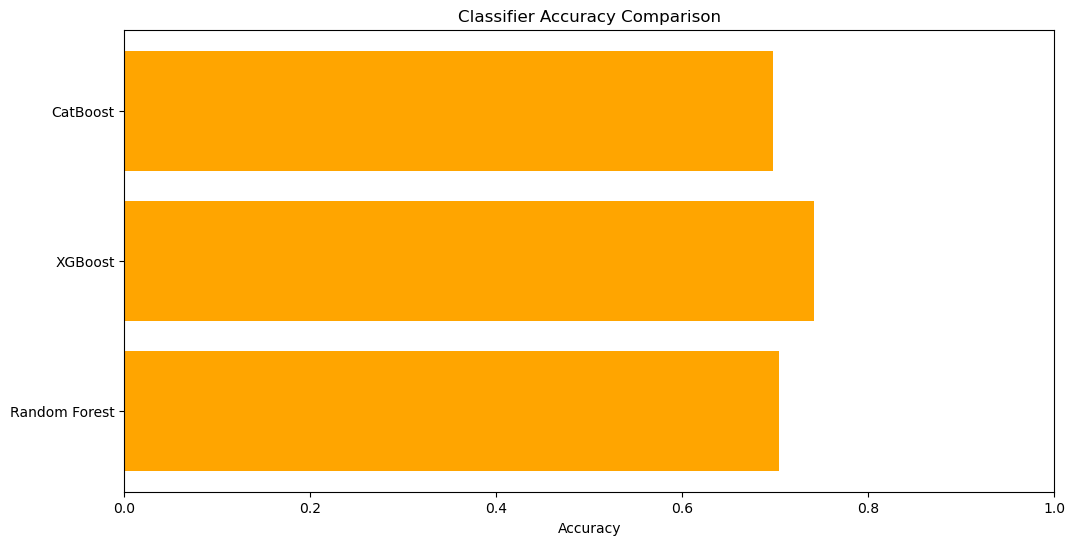

In [483]:
# Define and initialize the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(
    n_estimators=100,  # Number of trees
    max_depth=5,  # Maximum depth of each tree
    learning_rate=0.1,  # Learning rate (eta)
    use_label_encoder=False,  # Turn off label encoder 
    eval_metric='mlogloss',  # Metric for multi-class classification
    random_state=42
),
    'CatBoost': CatBoostClassifier(
    iterations=100,  # Number of boosting iterations
    depth=6,  # Depth of each tree
    learning_rate=0.1,  # Learning rate
    loss_function='MultiClass',  # For multi-class classification
    random_seed=42,
    verbose=False  # Set to True to get detailed output during training
)
}

# Train, predict, and evaluate each classifier
results = {}
for name, model in classifiers.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the result
    results[name] = accuracy

# Display the results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# Filter for specific models
filtered_results_df = results_df[results_df['Model'].isin(['Random Forest', 'XGBoost', 'CatBoost'])]

# Plotting the filtered results
plt.figure(figsize=(12, 6))
plt.barh(filtered_results_df['Model'], filtered_results_df['Accuracy'], color='orange')
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.xlim(0, 1)  # Setting x-axis limits to 0-1 for accuracy
plt.show()


### Topic Modeling

### LDA Model

In [485]:
news = pd.read_csv("bcc_news.csv")

In [487]:
news.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [489]:
from collections import Counter
import re

# Tokenize all text in the corpus to build word frequencies
all_words = []
for i in range(len(news)):
    statement = re.sub('[^a-zA-Z]', ' ', news['text'][i])
    statement = statement.lower()
    statement = statement.split()
    all_words.extend(statement)

# Count word frequencies
word_freq = Counter(all_words)

# Identify the most common words (e.g., top 10 most frequent words)
most_common_words = [word for word, freq in word_freq.most_common(90)]

# Filter out both stopwords and the most common words
tokenized_corpus = []
for i in range(len(news)):
    statement = re.sub('[^a-zA-Z]', ' ', news['text'][i])
    statement = statement.lower()
    statement = statement.split()
    # Remove stopwords and common words
    statement = [word for word in statement if word not in all_stopwords and word not in most_common_words]
   
    tokenized_corpus.append(statement)


In [491]:
import gensim
from gensim import corpora, models
# Create Dictionary and Corpus (BoW format)
id2word = corpora.Dictionary(tokenized_corpus)  # Create dictionary of unique words
corpus_bow = [id2word.doc2bow(text) for text in tokenized_corpus]  # Create corpus (BoW format)


In [493]:
# Build LDA model
lda_model_words = gensim.models.LdaMulticore(corpus=corpus_bow,
                                       id2word=id2word,
                                       num_topics=5, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)


In [495]:
from pprint import pprint

# Print the topics and their keywords
pprint(lda_model_words.print_topics(num_words=5)) 

[(0,
  '0.005*"market" + 0.004*"mobile" + 0.003*"sales" + 0.003*"growth" + '
  '0.003*"company"'),
 (1,
  '0.010*"film" + 0.003*"awards" + 0.003*"show" + 0.003*"british" + '
  '0.003*"london"'),
 (2,
  '0.006*"music" + 0.005*"club" + 0.004*"song" + 0.004*"united" + '
  '0.004*"band"'),
 (3,
  '0.006*"labour" + 0.005*"election" + 0.005*"blair" + 0.004*"party" + '
  '0.004*"minister"'),
 (4,
  '0.004*"game" + 0.003*"net" + 0.003*"england" + 0.003*"e" + '
  '0.003*"broadband"')]


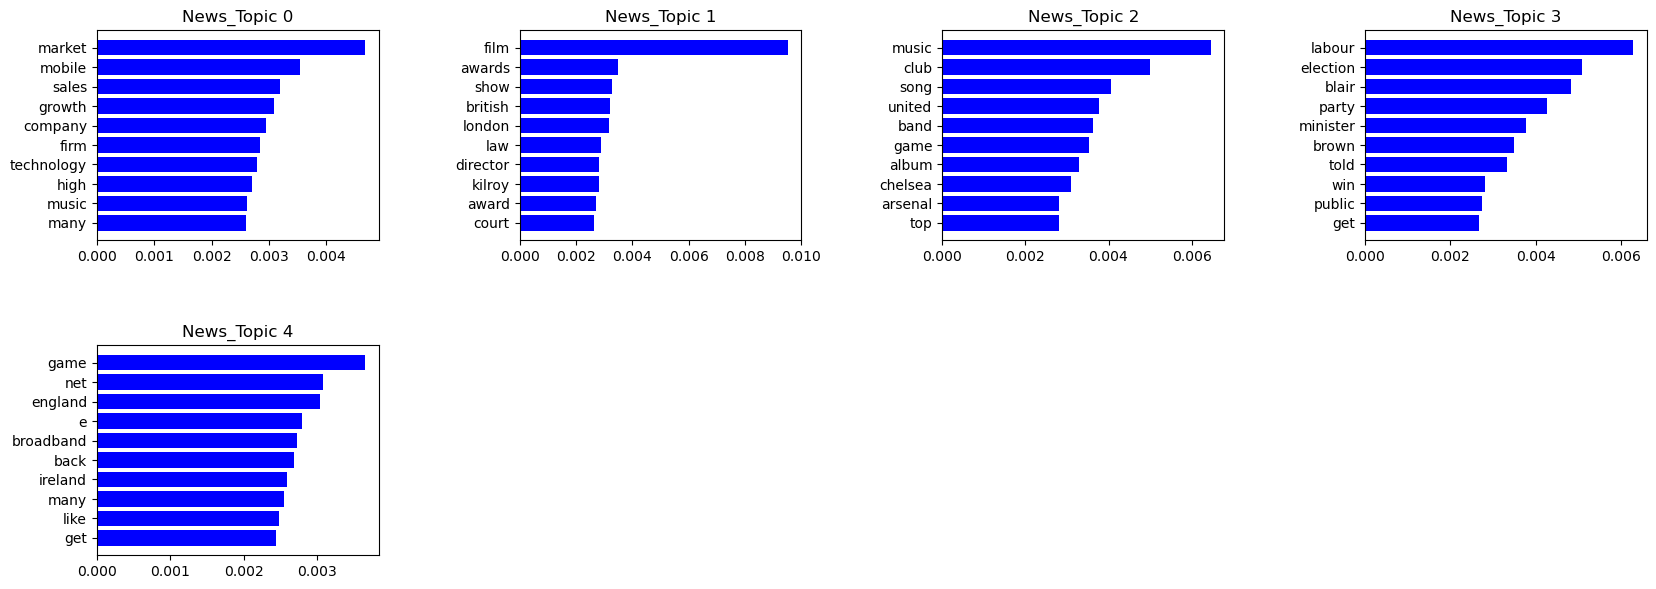

In [497]:
import matplotlib.pyplot as plt
import math
from matplotlib import gridspec
k =10
def plot_top_words(lda=lda_model_words , nb_topics=5, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("News_Topic "+str(i))
        
  
plot_top_words()

sports - topic2 , business - topic0, politics - topic3 , technology - topic4 , entertaintment - topic1

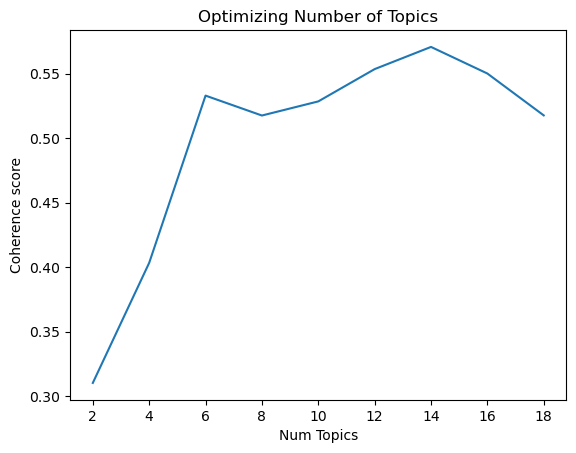

In [499]:
from gensim.models import CoherenceModel
import numpy as np

def compute_coherence_values(corpus, dictionary, texts, limit, start=2, step=3):
    """
    Function to perform grid search over 'num_topics' to optimize topic coherence.
    Parameters:
    ----------
    corpus : Gensim corpus
    dictionary : Gensim dictionary
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           iterations=100,
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Grid Search for the best num_topics
model_list, coherence_values = compute_coherence_values(corpus=corpus_bow, 
                                                        dictionary=id2word, 
                                                        texts=tokenized_corpus, 
                                                        start=2, limit=20, step=2)

# Plotting coherence values to choose the best number of topics
import matplotlib.pyplot as plt

x = range(2, 20, 2)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title("Optimizing Number of Topics")
plt.show()

# Select the model with the highest coherence score
best_num_topics = x[np.argmax(coherence_values)]
best_model = model_list[np.argmax(coherence_values)]


## Pickle

import pickle
import os

# Ensure the 'models' directory exists, if not create it
if not os.path.exists('models'):
    os.makedirs('models')

# Save the CountVectorizer inside 'models' folder
with open(os.path.join('models', 'vectorizer.pickle'), 'wb') as file:
    pickle.dump(cv, file)

# Save the XGBoost model inside 'models' folder
with open(os.path.join('models', 'xgb_model.pickle'), 'wb') as file:
    pickle.dump(xgb_model, file)

# Save the LabelEncoder inside 'models' folder
with open(os.path.join('models', 'label_encoder.pickle'), 'wb') as file:
    pickle.dump(label_encoder, file)

import os
import pickle
from gensim import corpora, models

# Ensure the 'models' directory exists, if not create it
if not os.path.exists('models'):
    os.makedirs('models')

# Save LDA model to 'models' folder
lda_model_path = os.path.join('models', 'lda_model.pickle')
with open(lda_model_path, 'wb') as file:
    pickle.dump(lda_model_words, file)

# Save Dictionary to 'models' folder
dictionary_path = os.path.join('models', 'dictionary.pickle')
with open(dictionary_path, 'wb') as file:
    pickle.dump(id2word, file)